In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
%matplotlib inline

##### Расматриваем два датасета
- Продажа пива рф с 1995-2009 год data.csv
- Просто рандомно вбитые цифры data2.csv

In [25]:
# Продажа пива
df = pd.read_csv('data.csv', sep=';')
df

,Год,t,Объем
0,1995,1,358.00
1,1996,2,384.85
2,1997,3,411.70
3,1998,4,408.20
4,1999,5,451.10
5,2000,6,524.60
6,2001,7,634.60
7,2002,8,707.80
8,2003,9,762.50
9,2004,10,844.70


In [26]:
# Рандомный
df = pd.read_csv('data2.csv', sep=';')
df

,t,yt
0,1,5.6
1,2,4.7
2,3,5.2
3,4,9.1
4,5,7.0
5,6,5.1
6,7,6.0
7,8,10.2
8,9,8.2
9,10,5.6


In [27]:
df = pd.read_csv('data.csv', sep=';')

### Скользящее среднее
Возьмем интервал равный 3
где вес будет годом(пусть и не логично), объем это с.в

In [28]:
WWMA = pd.DataFrame.from_dict({'t':[],'value':[]})

In [29]:
t=[i for i in range(3,len(df)+1)]
value = []
for i in t:
    value.append(
        np.sum(
            np.multiply(df['Год'][i-3:i],df['Объем'][i-3:i])
        )/np.sum(df['Год'][i-3:i]))
WWMA['t']=t
WWMA['value']=value                

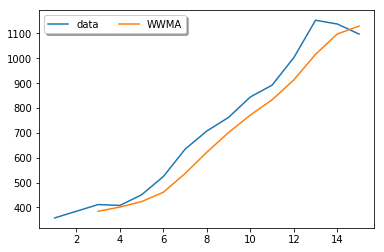

In [30]:
wwma_ax = plt.subplot(111)
plt.plot(df['t'],df['Объем'],label='data')
plt.plot(WWMA['t'],WWMA['value'],label='WWMA')
leg = plt.legend(loc='upper left', ncol=2, shadow=True, fancybox=True)
plt.show()

### Простое скользящее среднее
Возьмем интервал равный 3
объем это с.в

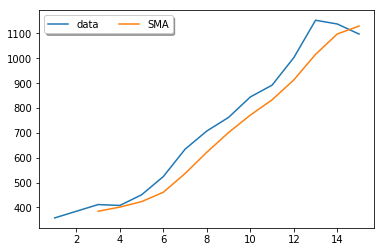

In [31]:
SMA = pd.DataFrame.from_dict({'t':[],'value':[]})
t=[i for i in range(3,len(df)+1)]
value = []
for i in t:
    value.append(np.sum(df['Объем'][i-3:i])/3)
SMA['t']=t
SMA['value']=value  
sma_ax = plt.subplot(111)
plt.plot(df['t'],df['Объем'],label='data')
plt.plot(SMA['t'],SMA['value'],label='SMA')
leg = plt.legend(loc='upper left', ncol=2, shadow=True, fancybox=True)
plt.show()

### Экспоненциальное скользящее среднее
Возьмем интервал равный 3<br>
объем это с.в, alf = 2/4=0.5<br>
EMA начальное это SMA, t=3

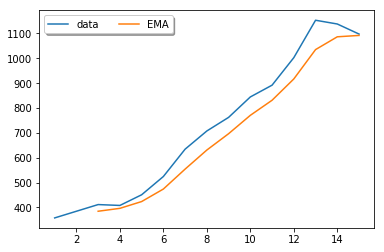

In [32]:
EMA = pd.DataFrame.from_dict({'t':[],'value':[]})
t=[i for i in range(3,len(df)+1)]
value = [SMA['value'][0]]
alf=0.5
for i in t[1:]:
    value.append(alf*df['Объем'][i-1]+(1-alf)*value[-1])
EMA['t']=t
EMA['value']=value  
ema_ax = plt.subplot(111)
plt.plot(df['t'],df['Объем'],label='data')
plt.plot(EMA['t'],EMA['value'],label='EMA')
leg = plt.legend(loc='upper left', ncol=2, shadow=True, fancybox=True)
plt.show()

### Взвешенное скользящее среднее
Возьмем интервал равный 3<br>
объем это с.в

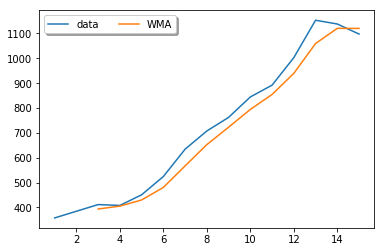

In [33]:
WMA = pd.DataFrame.from_dict({'t':[],'value':[]})
t=[i for i in range(3,len(df)+1)]
value = []
n_arr = np.array([i+1 for i in range(3)])
for i in t:
    value.append(
        2*np.sum(
            np.multiply(n_arr,df['Объем'][i-3:i])
        )/3/4)
WMA['t']=t
WMA['value']=value  
wma_ax = plt.subplot(111)
plt.plot(df['t'],df['Объем'],label='data')
plt.plot(WMA['t'],WMA['value'],label='WMA')
leg = plt.legend(loc='upper left', ncol=2, shadow=True, fancybox=True)
plt.show()

## Автокорреляция

In [34]:
df = pd.read_csv('data2.csv', sep=';')
df

,t,yt
0,1,5.6
1,2,4.7
2,3,5.2
3,4,9.1
4,5,7.0
5,6,5.1
6,7,6.0
7,8,10.2
8,9,8.2
9,10,5.6


Свое


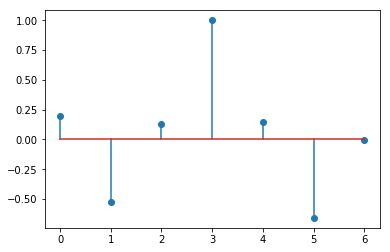

,t,log
0,1,0.191700
1,2,-0.514934
2,3,0.127183
3,4,0.986192
4,5,0.144815
5,6,-0.648683
6,7,-0.006472


In [35]:
cor = pd.DataFrame.from_dict({'t':[],'log':[]})
t,value=[],[]
n=len(df)
for i in range(1,n//2):
    t.append(i)
    m1 = np.mean(df['yt'][i:])
    m2 = np.mean(df['yt'][:n-i])
    r1 = np.array(df['yt'][i:]-m1)
    r2 = np.array(df['yt'][:n-i]-m2)
    value.append(np.sum(r1*r2)/np.sqrt(np.sum(r1*r1)*np.sum(r2*r2)))
cor['t']=t
cor['log']=value
print('Свое')
ax = plt.gca()
ax.stem(cor['log']/cor['log'].max())
plt.show()
cor

## Критерий Ирвина

In [36]:
irv = pd.DataFrame.from_dict({'t':[],'lambda':[]})
y = np.array([50,56,46,48,49,46,48,47,47,49])
t=[]
value = []
std_y = np.sqrt(np.sum((y-y.mean())**2)/(len(y)-1))
for i in range(1,len(y)):
    t.append(i)
    value.append(np.fabs(y[i]-y[i-1])/std_y)
irv['t']=t
irv['lambda']=value
irv

,t,lambda
0,1,2.059329
1,2,3.432216
2,3,0.686443
3,4,0.343222
4,5,1.029665
5,6,0.686443
6,7,0.343222
7,8,0.000000
8,9,0.686443


#### Видим что 1 и 2 не подходят

## Метод Серий На медиане
Используем 1 датасет уровень значимости 0.5

In [37]:
def have_trend(ser):
    n=len(ser)
    vn=1
    r_max=1
    t = ser[0]
    cur_len=1
    for i in ser[1:]:
        if t == i:
            cur_len+=1
        else:
            vn+=1
            t=i
            r_max = max(cur_len,r_max)
            cur_len=1
    if r_max>int(3.3*(np.log10(n)+1)) and vn<int((n+1-1.96*np.sqrt(n-1))/2):
        return 'Trend exist'
    return 'Trend not exist'

In [38]:
df = pd.read_csv('data.csv', sep=';')
ser = []
median = df['Объем'].median()
for i in range(len(df)):
    ser.append(df['Объем'][i]>median)
have_trend(ser)

'Trend exist'

Видим что тренд существует<br>
Прмиер два

In [39]:
df = pd.read_csv('data2.csv', sep=';')
ser = []
median = df['yt'].median()
for i in range(len(df)):
    ser.append(df['yt'][i]>median)
have_trend(ser)

'Trend not exist'

Эти даныне были просто наугад у них тренда как и ожидалось нет

## Критерий восходящих и нисходящих серий 
Используем 1 датасет уровень значимости 0.5

In [40]:
def have_trend(ser):
    n=len(ser)
    vn=1
    r_max=1
    t = ser[0]
    cur_len=1
    for i in ser[1:]:
        if t == i:
            cur_len+=1
        else:
            vn+=1
            t=i
            r_max = max(cur_len,r_max)
            cur_len=1
    k0 = 5
    if n>26 and n<=153:
        k0=6
    elif n>153 and n<=1170:
        k0=7
    print(n,ser,r_max,k0,vn,int((2*n-1)/3-1.96*np.sqrt((16*n-29)/90)))
    if r_max<k0 and vn>int((2*n-1)/3-1.96*np.sqrt((16*n-29)/90)):
        return 'Trend not exist'
    return 'Trend exist'

In [41]:
# Первый датасет реальный
df = pd.read_csv('data.csv', sep=';')
ser = []
for i in range(len(df)-1):
    if df['Объем'][i+1]-df['Объем'][i]>0:
        ser.append(True)
    elif df['Объем'][i+1]-df['Объем'][i]<0:
        ser.append(False)
    else:
        ser.append(df['Объем'][i]>0)
ser.append(df['Объем'][len(df)-1]>0)
have_trend(ser)

15 [True, True, False, True, True, True, True, True, True, True, True, True, False, False, True] 9 5 5 6


'Trend exist'

In [42]:
# Второй датасет нереальный
df = pd.read_csv('data2.csv', sep=';')
ser = []
for i in range(len(df)-1):
    if df['yt'][i+1]-df['yt'][i]>0:
        ser.append(True)
    elif df['yt'][i+1]-df['yt'][i]<0:
        ser.append(False)
    else:
        ser.append(df['yt'][i]>0)
ser.append(df['yt'][len(df)-1]>0)
have_trend(ser)

16 [False, True, True, False, False, True, True, False, False, True, True, False, False, True, True, True] 2 5 8 7


'Trend not exist'

## Првоерка тренда с помощью Критерия стьюдента
коэффиценты брал отсюда
alf =0.05
http://univer-nn.ru/econometrica/Fisher-Student-table.pdf

In [43]:
df= pd.read_csv('data.csv', sep=';')
# Разделил на примерно равные части
y1,y2 = np.array(df['Объем'][:8]),np.array(df['Объем'][8:])
n1,n2=len(y1),len(y2)
y1_mean,y2_mean = np.mean(y1),np.mean(y2)
y1_std = np.sum((y1-y1_mean)**2)/(n1-1)
y2_std = np.sum((y2-y2_mean)**2)/(n2-1)

In [44]:
F_cr = 3.73
T_cr = 2.13

In [45]:
F_emp = y2_std/y1_std
if F_emp<F_cr:
    print('H0 не отвергаем идем далее')
else:
    print('H0 не принмиаем конец')

H0 не отвергаем идем далее


In [46]:
T_emp = np.fabs(y1_mean-y2_mean)
T_emp/=np.sqrt((n1-1)*y1_std+
               (n2-1)*y2_std)
T_emp*=np.sqrt(n1*n2*(n1+n2-2)/(n1+n2))
if T_emp <T_cr:
    print('''Тренда нет ''')
else:
    print('''Тренд есть ''')

Тренд есть 
